# Import packages

In [166]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Read dataset
### Read dataset into dataframes and display the 1st 5 rows

In [167]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("Manhattan12.csv", skiprows=4)
df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27395 entries, 0 to 27394
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         27395 non-null  int64 
 1   NEIGHBORHOOD                    27395 non-null  object
 2   BUILDING CLASS CATEGORY         27395 non-null  object
 3   TAX CLASS AT PRESENT            27395 non-null  object
 4   BLOCK                           27395 non-null  int64 
 5   LOT                             27395 non-null  int64 
 6   EASE-MENT                       27395 non-null  object
 7   BUILDING CLASS AT PRESENT       27395 non-null  object
 8   ADDRESS                         27395 non-null  object
 9   APART
MENT
NUMBER               27395 non-null  object
 10  ZIP CODE                        27395 non-null  int64 
 11  RESIDENTIAL UNITS               27395 non-null  object
 12  COMMERCIAL UNITS                27395 non-null

In [169]:
# Dtype conversion
df.columns = df.columns.str.strip().str.replace("\n", "")

def format_and_convert_column_to_numeric(col, dtype):
    df[col] = df[col].str.replace(",","").str.replace("$","").astype(dtype)
    
format_and_convert_column_to_numeric('SALEPRICE', np.int64)
format_and_convert_column_to_numeric('GROSS SQUARE FEET', np.float64)
format_and_convert_column_to_numeric('LAND SQUARE FEET', np.float64)
format_and_convert_column_to_numeric('RESIDENTIAL UNITS', np.int64)
format_and_convert_column_to_numeric('TOTAL UNITS', np.int64)

# Convert To datetime
df['SALE DATE'] =pd.to_datetime(df['SALE DATE'], dayfirst=True)

df['YEAR BUILT'] = df['YEAR BUILT'].astype(np.int64)

/var/folders/4m/__j4737x1p73lg1hgfht7tnm0000gn/T/ipykernel_47088/2674278097.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace(",","").str.replace("$","").astype(dtype)


In [170]:
cat_vars = df.select_dtypes(include='object').columns.tolist()
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
print("Categorical columns: ", cat_vars)
print("Numerical columns: ", num_vars)

Categorical columns:  ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENTNUMBER', 'BUILDING CLASS AT TIME OF SALE']
Numerical columns:  ['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'SALEPRICE']


In [171]:
df[cat_vars] = df[cat_vars].apply(lambda x: x.str.strip())
df.replace("", np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27395 entries, 0 to 27394
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         27395 non-null  int64         
 1   NEIGHBORHOOD                    27378 non-null  object        
 2   BUILDING CLASS CATEGORY         23941 non-null  object        
 3   TAX CLASS AT PRESENT            27252 non-null  object        
 4   BLOCK                           27395 non-null  int64         
 5   LOT                             27395 non-null  int64         
 6   EASE-MENT                       0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       27252 non-null  object        
 8   ADDRESS                         27395 non-null  object        
 9   APARTMENTNUMBER                 12825 non-null  object        
 10  ZIP CODE                        27394 non-null  float64       
 11  RE

## Rename the column names by deleting the carriage return

In [172]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENTNUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,SALE DATE
0,1,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1306,NaN,NaN,345 WEST 14TH STREET,NaN,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,R4,2214693.0,2013-05-20
1,1,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1307,NaN,NaN,345 WEST 14TH STREET,NaN,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,R4,1654656.0,2013-05-16
2,1,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1308,NaN,NaN,345 WEST 14TH STREET,NaN,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,R4,1069162.0,2013-05-23
3,1,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1309,NaN,NaN,345 WEST 14TH STREET,NaN,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,R4,1374637.0,2013-05-15
4,1,NaN,13 CONDOS - ELEVATOR APARTMENTS,NaN,738,1310,NaN,NaN,345 WEST 14TH STREET,NaN,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,R4,1649565.0,2013-05-13


In [173]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                         17
BUILDING CLASS CATEGORY            3454
TAX CLASS AT PRESENT                143
BLOCK                                 0
LOT                                   0
EASE-MENT                         27395
BUILDING CLASS AT PRESENT           143
ADDRESS                               0
APARTMENTNUMBER                   14570
ZIP CODE                              1
RESIDENTIAL UNITS                 16372
COMMERCIAL UNITS                  23962
TOTAL UNITS                        9704
LAND SQUARE FEET                  22906
GROSS SQUARE FEET                 23069
YEAR BUILT                         6441
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALEPRICE                          7593
SALE DATE                             0
dtype: int64

In [174]:
df['YEAR BUILT'].fillna(method='ffill', inplace=True)
pd.DataFrame(df['BUILDING CLASS CATEGORY'].value_counts()).size

32

In [175]:
df.drop(columns=['COMMERCIAL UNITS', 'RESIDENTIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BOROUGH', 'EASE-MENT', 'APARTMENTNUMBER'], inplace=True)

In [176]:
df.columns


Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'ZIP CODE',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALEPRICE', 'SALE DATE'],
      dtype='object')

Create list of categorical variables and another for the numerical variables

In [177]:

# ADDRESS and BUILDING CLASS CATEGORY has more than one white spaces between words in some rows. Replace it with a single space for cleaner data
df['ADDRESS'] = df['ADDRESS'].apply(lambda x: " ".join(x.split()))

In [178]:
df.describe()

,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALEPRICE
count,27395.000000,27395.000000,27394.000000,3433.000000,17691.000000,4489.000000,27378.000000,27395.000000,1.980200e+04
mean,1109.666728,741.789086,10029.226217,2.992426,3.545249,5893.466028,1955.316422,2.488118,2.556609e+06
std,465.994469,819.422424,34.966983,12.689861,19.482767,7884.729624,39.196918,0.891723,1.916295e+07
min,7.000000,1.000000,10001.000000,1.000000,1.000000,200.000000,1000.000000,1.000000,1.000000e+00
25%,877.000000,37.000000,10016.000000,1.000000,1.000000,2104.000000,1920.000000,2.000000,3.676662e+05
50%,1047.000000,1007.000000,10019.000000,2.000000,1.000000,5046.000000,1957.000000,2.000000,7.400000e+05
75%,1411.000000,1233.000000,10027.000000,2.000000,1.000000,7532.000000,2002.000000,4.000000,1.627399e+06
max,2250.000000,9117.000000,10463.000000,604.000000,1349.000000,213650.000000,2013.000000,4.000000,1.307965e+09


For each categorical variable, remove the spaces, and then replace the empty string '' by NaN.

In [179]:
df = df[df['YEAR BUILT']!=1000]
df.describe()

,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALEPRICE
count,27394.000000,27394.000000,27393.000000,3433.000000,17691.000000,4488.000000,27377.000000,27394.000000,1.980200e+04
mean,1109.676900,741.813901,10029.227248,2.992426,3.545249,5894.209893,1955.351317,2.488063,2.556609e+06
std,465.999933,819.427086,34.967206,12.689861,19.482767,7885.450660,38.770045,0.891692,1.916295e+07
min,7.000000,1.000000,10001.000000,1.000000,1.000000,200.000000,1800.000000,1.000000,1.000000e+00
25%,877.000000,37.000000,10016.000000,1.000000,1.000000,2103.000000,1920.000000,2.000000,3.676662e+05
50%,1047.000000,1007.000000,10019.000000,2.000000,1.000000,5046.000000,1957.000000,2.000000,7.400000e+05
75%,1411.000000,1233.000000,10027.000000,2.000000,1.000000,7532.000000,2002.000000,4.000000,1.627399e+06
max,2250.000000,9117.000000,10463.000000,604.000000,1349.000000,213650.000000,2013.000000,4.000000,1.307965e+09


In [180]:
new_df = df[df['TOTAL UNITS'] < 80].dropna(subset=['TOTAL UNITS'])

In [181]:
new_df['INDEX'] = np.arange(new_df.shape[0])


<AxesSubplot: xlabel='TOTAL UNITS', ylabel='INDEX'>

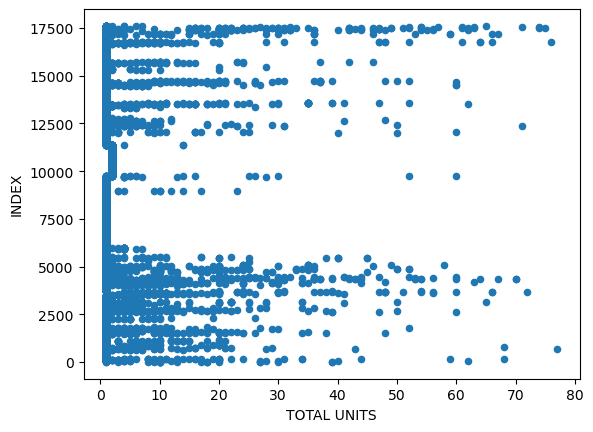

In [182]:
new_df.plot.scatter(x='TOTAL UNITS', y='INDEX')

In [183]:
df = df[df['TOTAL UNITS'] < 50]

Replace the zeros in Prices, Land squares, etc. by NaN

Show a summary of all missing values as well as the summary statistics

In [184]:
print("Summary of missing values:\n", df.isnull().sum())

Summary of missing values:
 NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY            3434
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
COMMERCIAL UNITS                  14181
TOTAL UNITS                           0
LAND SQUARE FEET                  13374
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALEPRICE                          6646
SALE DATE                             0
dtype: int64


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17532 entries, 17 to 27386
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NEIGHBORHOOD                    17532 non-null  object        
 1   BUILDING CLASS CATEGORY         14098 non-null  object        
 2   TAX CLASS AT PRESENT            17532 non-null  object        
 3   BLOCK                           17532 non-null  int64         
 4   LOT                             17532 non-null  int64         
 5   BUILDING CLASS AT PRESENT       17532 non-null  object        
 6   ADDRESS                         17532 non-null  object        
 7   ZIP CODE                        17532 non-null  float64       
 8   COMMERCIAL UNITS                3351 non-null   float64       
 9   TOTAL UNITS                     17532 non-null  float64       
 10  LAND SQUARE FEET                4158 non-null   float64       
 11  Y

<AxesSubplot: xlabel='TOTAL UNITS', ylabel='SALEPRICE'>

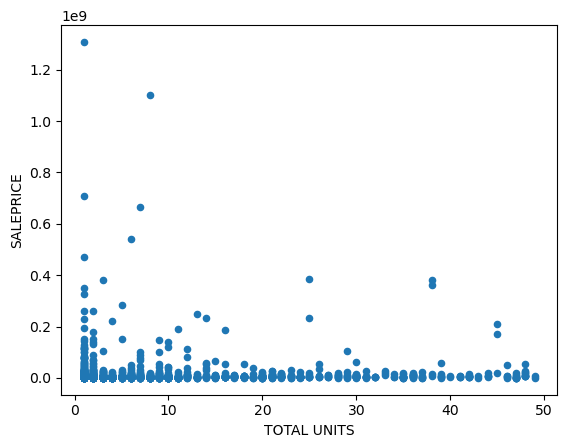

In [186]:
df.plot.scatter(x='TOTAL UNITS', y='SALEPRICE')

In [187]:
df = df[df['SALEPRICE'] < 4000000]

<AxesSubplot: ylabel='Frequency'>

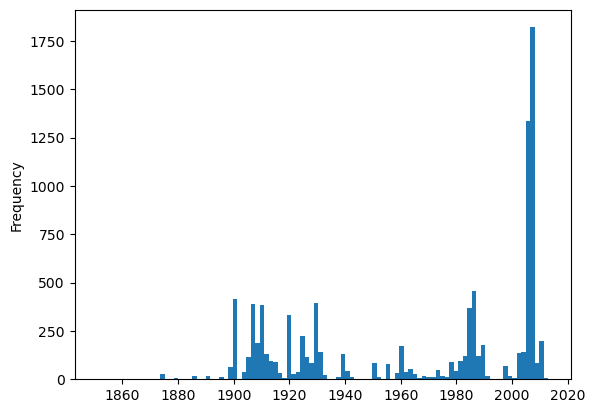

In [188]:
df['YEAR BUILT'].plot.hist(bins=100)

In [189]:
df = df[df['YEAR BUILT'] > 1900]

Drop duplicates if any

In [190]:
df.drop_duplicates(inplace=True)
df.shape

(8230, 16)

In [191]:
df.isnull().sum()

NEIGHBORHOOD                         0
BUILDING CLASS CATEGORY           1097
TAX CLASS AT PRESENT                 0
BLOCK                                0
LOT                                  0
BUILDING CLASS AT PRESENT            0
ADDRESS                              0
ZIP CODE                             0
COMMERCIAL UNITS                  7227
TOTAL UNITS                          0
LAND SQUARE FEET                  7042
YEAR BUILT                           0
TAX CLASS AT TIME OF SALE            0
BUILDING CLASS AT TIME OF SALE       0
SALEPRICE                            0
SALE DATE                            0
dtype: int64

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8230 entries, 17 to 27379
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NEIGHBORHOOD                    8230 non-null   object        
 1   BUILDING CLASS CATEGORY         7133 non-null   object        
 2   TAX CLASS AT PRESENT            8230 non-null   object        
 3   BLOCK                           8230 non-null   int64         
 4   LOT                             8230 non-null   int64         
 5   BUILDING CLASS AT PRESENT       8230 non-null   object        
 6   ADDRESS                         8230 non-null   object        
 7   ZIP CODE                        8230 non-null   float64       
 8   COMMERCIAL UNITS                1003 non-null   float64       
 9   TOTAL UNITS                     8230 non-null   float64       
 10  LAND SQUARE FEET                1188 non-null   float64       
 11  YE

In [193]:
df.describe()

,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALEPRICE
count,8230.000000,8230.000000,8230.000000,1003.000000,8230.000000,1188.000000,8230.00000,8230.000000,8.230000e+03
mean,1044.446537,1215.614824,10030.502552,1.927218,1.648117,5799.973064,1969.04192,2.552369,1.033776e+06
std,494.215687,856.727500,43.654230,1.721557,3.399637,3035.049342,38.96710,0.916022,9.725555e+05
min,15.000000,1.000000,10001.000000,1.000000,1.000000,469.000000,1901.00000,1.000000,1.000000e+00
25%,859.000000,1032.000000,10016.000000,2.000000,1.000000,2500.000000,1928.00000,2.000000,1.600000e+05
50%,1027.000000,1175.500000,10019.000000,2.000000,1.000000,7532.000000,1985.00000,2.000000,7.950000e+05
75%,1323.000000,1339.000000,10026.000000,2.000000,1.000000,7532.000000,2006.00000,4.000000,1.530000e+06
max,2238.000000,9046.000000,10463.000000,43.000000,49.000000,37305.000000,2013.00000,4.000000,3.995000e+06


Drop rows with NaN values

In [194]:
df.dropna(inplace=True)
df.shape

(887, 16)

Identify and remove outliers if any

In [195]:
print("\nShape of the resulting dataframe:", df.shape)



Shape of the resulting dataframe: (887, 16)


•	Consider the log of the prices and normalise the data.

<AxesSubplot: ylabel='Frequency'>

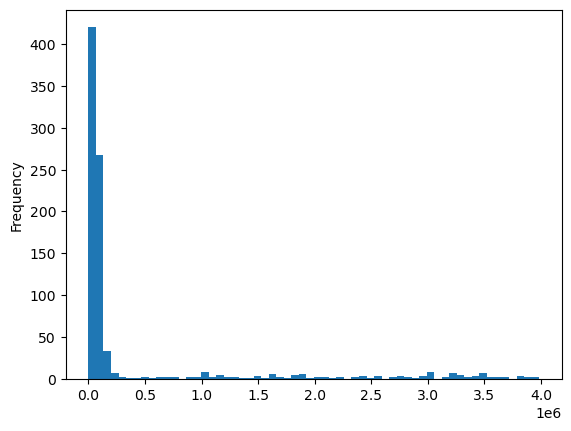

In [196]:
df['SALEPRICE'].plot.hist(bins=60)

<AxesSubplot: ylabel='Frequency'>

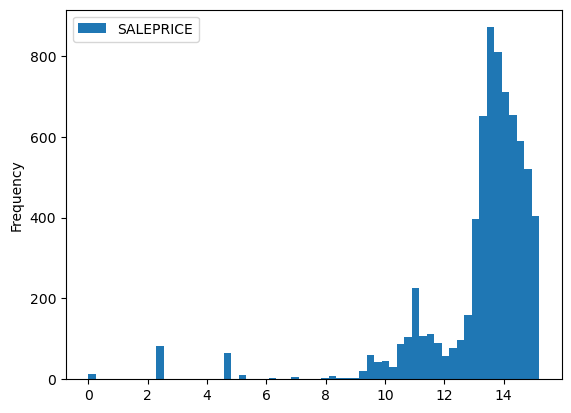

In [165]:
pd.DataFrame(np.log(df['SALEPRICE'])).plot.hist(bins=60)